# Exercício Prático - Deep Learning - CNN

## Preencha a célula abaixo com seu nome e e-mail:

In [0]:
# João Tribouillet Marcial de Menezes
# jotatri@gmail.com

# Classificação de objetos do conjunto de dados CIFAR-10

# Exercício: Treinem uma rede neural convolucional para classificar entre as categorias do conjunto de dados CIFAR-10. Neste exercício é necessário que seja usada a neural  VGG16 (rede pré-treinada para classificar entre 1000 categorias de objetos) usando a forma mais adequada de *transfer learning*.

### - Pesquisem quais as categorias que a VGG16 já classifica e veja também as categorias do CIFAR-10, a fim de usar a técnica de *transfer learning* da melhor forma.
### - CIFAR-10 já pode ser importado pelo próprio framework Keras através da linda de código: 
### from keras.datasets import cifar10
### - Para importar o modelo da VGG16 use o a linha de comando:
### from keras.applications.vgg16 import VGG16

### Serão avaliados nesse exercício:
     1 - Codagem limpa e modulariada;
     2 - Código comentado quando necessário;
     3 - Criatividade para solucionar o problema;
     4 - Qualidade da solução (métricas de avaliação adicionais são um *plus*, ou seja, além da acurácia e função perda);
     5 - Explicação da metódologia usada;

### <font color='red'> Prazo de entrega: 26/02/2020 até 23:59 da noite!</font>
### <font color='red'> Enviar para o e-mail: viniciusita@gmail.com</font>
### <font color='red'> Assunto do e-mail: 'Exercício DL - hackathon stefanini 2020'</font>

## 1 - Importando bibliotecas

In [0]:
from keras.datasets import cifar10 # método para baixar dataset cifar-10 via keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import rmsprop, SGD, Adam
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


## 2 - Download do dataset CIFAR-10 via keras

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


## 3 - Mostre o SHAPE dos dataset de treino e de teste

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
y_train.shape

(50000, 1)

In [0]:
y_test.shape

(10000, 1)

## 4 - Quantos canais as imagens deste dataset apresentam? Quantas classes diferentes esse dataset apresenta? Descrubra isso usando código python! :)

A seguir, determinamos a quantidade de classes existentes no dataset. Para isso, verificamos os valores únicos da junção entre os conjuntos y_train e y_test

In [0]:
# verificação dos valores únicos presentes nas variáveis de labels existentes
np.unique([np.unique(y_train), np.unique(y_test)])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

A partir da verificação do shape dos conjuntos X_train e X_test, observa-se que ele possui 3 dimensões. Isso é indicativo de que cada pixel possui 3 valores atrelados a ele, sendo cada um relacionado a uma cor entre Vermelho, Verde e Azul. A seguir, é exposto cada uma das cores presentes em uma imagem.

(32, 32, 3)

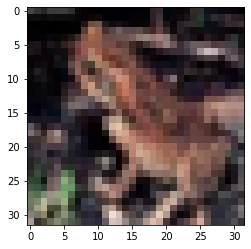

In [0]:
from random import randint

img_index = randint(0, X_train.shape[0])

plt.imshow(X_train[img_index])
first_img = X_train[img_index]
first_img.shape

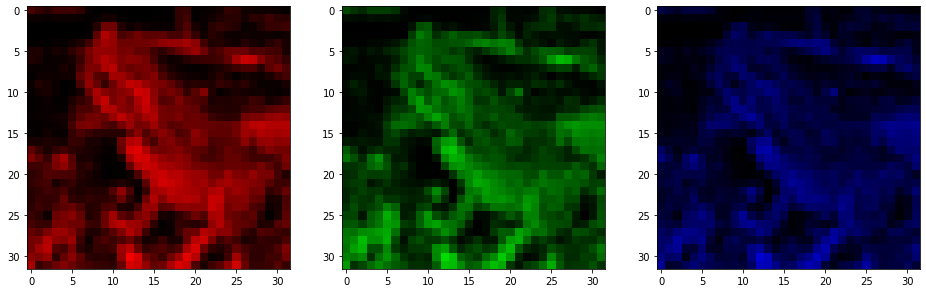

In [0]:
fig, axarr = plt.subplots(1,3) 
fig.set_figheight(16)
fig.set_figwidth(16)

monochrome_img = first_img[:,:,0]
monochrome_img = np.expand_dims(monochrome_img, axis=2)

output = []
for item in monochrome_img:
  output.append([np.pad(x, (0, 3 - len(x)), 'constant') for x in item])
axarr[0].imshow(output)

monochrome_img = first_img[:,:,1]
monochrome_img = np.expand_dims(monochrome_img, axis=2)

output = []
for item in monochrome_img:
  output.append([np.pad(x, (1, 2 - len(x)), 'constant') for x in item])
axarr[1].imshow(output)


monochrome_img = first_img[:,:,2]
monochrome_img = np.expand_dims(monochrome_img, axis=2)

output = []
for item in monochrome_img:
  output.append([np.pad(x, (2, 1 - len(x)), 'constant') for x in item])
axarr[2].imshow(output)

## 5 - Visualizando o dataset

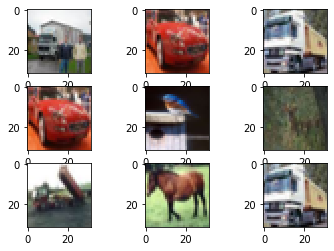

In [0]:
import random
import math

random_indexes = [random.randrange(1,17,1) for _ in range(9)]

num_total = len(random_indexes)

rows = int(math.sqrt(num_total))
cols = rows

for idx, i in enumerate(random_indexes):
    subplot_index = ''+str(rows)+str(cols)+str(idx+1)
    plt.subplot(int(subplot_index))
    plt.imshow(X_train[i], cmap='gray')

plt.show()

In [0]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
(unique, counts) = np.unique(y_train.T, return_counts=True)
for i in range(10):
    print('Class: {} >>>> qt: {}'.format(unique[i], counts[i]))

Class: 0 >>>> qt: 5000
Class: 1 >>>> qt: 5000
Class: 2 >>>> qt: 5000
Class: 3 >>>> qt: 5000
Class: 4 >>>> qt: 5000
Class: 5 >>>> qt: 5000
Class: 6 >>>> qt: 5000
Class: 7 >>>> qt: 5000
Class: 8 >>>> qt: 5000
Class: 9 >>>> qt: 5000


## 6 - É necessário fazer um *reshape* nas imagens do dataset?

In [0]:
# Apenas transforma em tipo float32
# X_train_resize2 = X_train_resize[:10].astype('float32')
# X_train_resize2.shape
# X_test_resize = X_test_resize.astype('float32')

In [0]:
from keras.applications.vgg16 import VGG16

In [0]:
VGG16().summary()





553467904/553467096 [==============================] - 34s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________

A partir desse output do *summary*, verifica-se que a camada de input padrão do modelo é 244x244. Entretanto, segundo a documentação, existe um parâmetro que especifica o *shape* de entrada do modelo (**input shape**). No bloco a seguir, é apresentado o *summary* do model com esse parâmetro especificado igual aos das imagens do dataset (32x32x3)


In [0]:
VGG16(include_top=False, input_shape=(32,32,3)).summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

Nele, percebemos que todas as camadas de tratamento da imagem foram adaptadas para o novo input shape. Também percebe-se que as camadas **Dense** junto com a **Flatten** não existem mais. Como essas camadas mais profundas não são de interesse para o dataset utilizado, isso não será um problema.

## 7 - Transforme os rótulos (*labels*) de inteiros para *one-hot encoding*

A seguir, utiliza-se o método **to_categorical** para codificação *one-hot* das classes tanto para o conjunto de treino quanto para o de teste.

In [0]:
from keras.utils import to_categorical

y_train_one = (to_categorical(y_train))
y_test_one = (to_categorical(y_test))

## 8 - Imprima 10 amostras dos rótulos de treino em *one-hot encoding*

In [0]:
for i in range(10):
  print('Original: {} >>>> Encoded: {}'.format(y_train[i], y_train_one[i]))
# print(y_train_one[:10])

Original: [6] >>>> Encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Original: [9] >>>> Encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Original: [9] >>>> Encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Original: [4] >>>> Encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Original: [1] >>>> Encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Original: [1] >>>> Encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Original: [2] >>>> Encoded: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Original: [7] >>>> Encoded: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Original: [8] >>>> Encoded: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Original: [3] >>>> Encoded: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## 9 - Crie o seu modelo de rede convolucional

### Lembre-se: O prazo para esta atividade será longo, visto que iremos apresentar técnicas ao longo do curso que ajudam a amelhorar a acurácia do seu modelo. Mas vocês já podem experimentar treinar o modelo que vocês arquitetarem para tentar uma boa taxa de acurácia no conjunto de dados de validação.

In [0]:
# Método que cria o modelo para treinamento baseando-se no VGG16. Ele recebe o input-shape
# para ser utilizado como a base do modelo VGG16 e o nome da última camada que se deseja
# utilizar os pesos originais do VGG16
def cnn_model(input_shape=(32,32,3), layer_name='block2_pool'):
    vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Coloca-se todas as camadas até a determinada pelo parametro layer_name como não treinável,
    # ou seja, utiliza-se os pesos do modelo original do VGG16
    for layer in vgg_model.layers:
        # print(layer.name)
        if layer.name == layer_name:
            break
        layer.trainable = False
    
    # Obtem-se a última camada do modelo
    layer = vgg_model.get_layer('block5_pool').output


    # Adiciona-se a camada de Flatten
    model = Flatten()(layer)

    # Adiciona-se as camadas hidden com ativação relu ainda seguindo o número de unidades do VGG16
    model = Dense(4096, activation='relu')(model)
    model = Dense(4096, activation='relu')(model)

    # Adiciona-se uma camada hidden
    model = Dense(2048, activation='relu')(model)
    
    # Adiciona-se a última camada para predição com função de ativação softmax
    model = Dense(10, activation='softmax', name='predictions')(model)


    # Inicia-se o modelo e ele é retornado
    model = Model(input=vgg_model.input, output=model)
    
    return model

## 10 - Instancie o modelo

In [0]:
model = cnn_model(input_shape=(32,32,3), layer_name='block3_pool')

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`


Acima, é visto todas as camadas do modelo criado. Uma informação importante é o valor de *Non-trainable params*, que indica que existem pessos determinados que não devem ser ajustados. Nesse caso, esses parâmetros se referem a todas as camadas até a **block3_pool** (1792 + 36928 + 73856 + 147584 + 295168 + 590080 + 590080)

In [0]:
1792 + 36928 + 73856 + 147584 + 295168 + 590080 + 590080 

1735488

## 11 - Compile o modelo

In [0]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

model.compile(optimizer=opt , loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 12 - Treine o modelo e armazene o histórico de treinamento para depois analisar as curva de acurácia e erro durante aprendizado 

### 1.2 - Escolha o tamanho do *batch* e o número de épocas para treinar o modelo :

In [0]:
num_epochs = 10
batch_size = 32

O bloco a seguir, é responsável pela criação de um ImageDataGenerator, que cria novas imagens com novas escalas ou "ângulos" a partir das imagens existentes no dataset original durante o treinamento.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=False)

train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,
                                     y_train_one,
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=False)

test_datagen.fit(X_test)
test_generator = test_datagen.flow(X_test,
                                 y_test_one,
                                 batch_size=batch_size)

train_steps_per_epoch = X_train.shape[0] // batch_size
test_steps_per_epoch = X_test.shape[0] // batch_size

In [0]:
history = model.fit_generator(train_generator,
                              validation_data=test_generator,
                              epochs=num_epochs,
                              verbose=1)



Epoch 1/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.1555 - acc: 0.9410 - val_loss: 0.1217 - val_acc: 0.9534
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.1064 - acc: 0.9597 - val_loss: 0.1139 - val_acc: 0.9572
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0832 - acc: 0.9687 - val_loss: 0.1226 - val_acc: 0.9564
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0637 - acc: 0.9764 - val_loss: 0.1089 - val_acc: 0.9621
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0482 - acc: 0.9825 - val_loss: 0.1085 - val_acc: 0.9623
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0369 - acc: 0.9868 - val_loss: 0.1351 - val_acc: 0.9607
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0283 - acc: 0.9900 - val_loss: 0.1313 - val_acc: 0.9610
Epoch 8/10
1563/1563 [========================

## 13 - Plote os gráficos de acurácia e perda (*loss*) de treino e teste :
#### * Estes valores ficam armazenados na variável *history* acima

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=history.epoch, y=history.history['acc'],
                    mode='lines',
                    name='training acc'),
                    row=1,
                    col=1)
fig.add_trace(go.Scatter(x=history.epoch, y=history.history['val_acc'],
                    mode='lines',
                    name='validation acc'),
                    row=1,
                    col=1)
fig.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'],
                    mode='lines',
                    name='training loss'),
                    row=1,
                    col=2)
fig.add_trace(go.Scatter(x=history.epoch, y=history.history['val_loss'],
                    mode='lines',
                    name='validation loss'),
                    row=1,
                    col=2)

## Extra: Plote os gráficos da curva ROC (Receiver Operating Characteristic) e a matriz de confusão referente ao classificador :


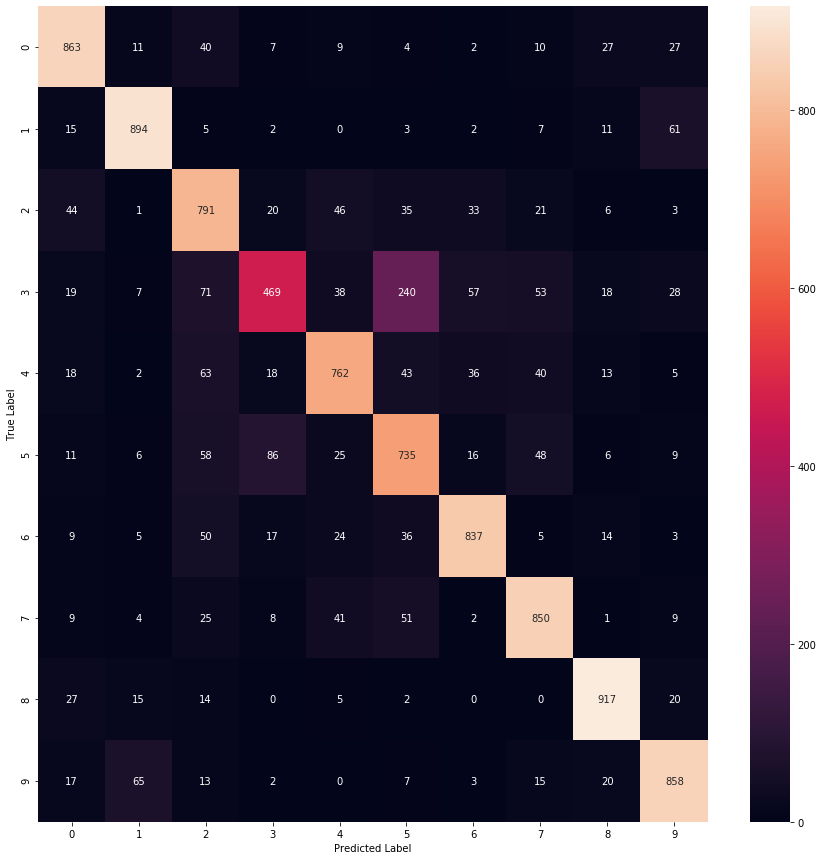

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test/255.)
matrix = confusion_matrix(np.argmax(y_test_one, axis=1), np.argmax(predictions, axis=1))


fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(matrix, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
fig.show()

In [0]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
roc_auc ={}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_one[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [0]:
fig = make_subplots(rows=2, cols=5)
fig.layout.update(height=1000, width=1500)


for key in fpr:
    fig.add_trace(go.Scatter(x=fpr[key], y=tpr[key],
                        mode='lines',
                        name='ROC '.format(key)),
                        col=(key + 1 if key <= 4 else key - 4),
                        row=(1 if key <= 4 else 2))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                        line=dict(dash='dash', color='royalblue'),
                        name='ROC Reference'.format(key)),
                        col=(key + 1 if key <= 4 else key - 4),
                        row=(1 if key <= 4 else 2))
fig.show()